In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (10, 8)

In [3]:
# initial parameters
n_iter = 50
sz = (n_iter,) #size of array
x = 1.90 # Truth Value
z = np.random.normal(x,0.1,size=sz) #observation (normal about x, sigma=0.1)

In [4]:
Q = 1e-5 #process variance

In [5]:
#allocate space for arrays
xhat=np.zeros(sz) # a posteri estimate of x
P=np.zeros(sz) # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)#a priori error estimate
K=np.zeros(sz) #gain or blending factor

In [6]:
R = 0.1**2 #estimate of measurement variance, change to see effect

In [7]:
#initial guesses
xhat[0] = 0.0
P[0] = 1.0

In [8]:
for k in range(1,n_iter):
    #time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

In [9]:
#measurement update
K[k] = Pminus[k]/(Pminus[k]+R )
xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
P[k] = (1-K[k])*Pminus[k]

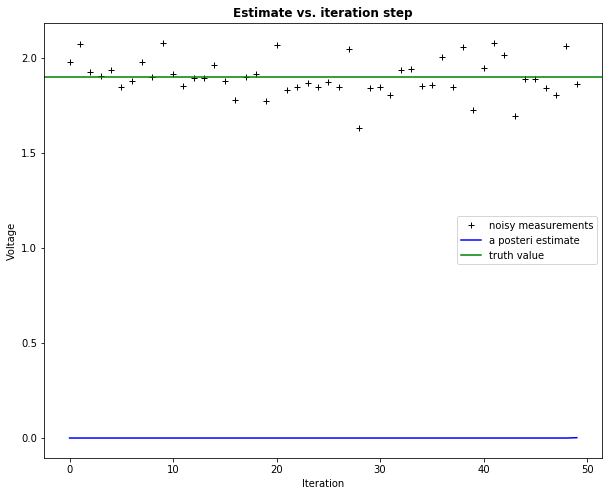

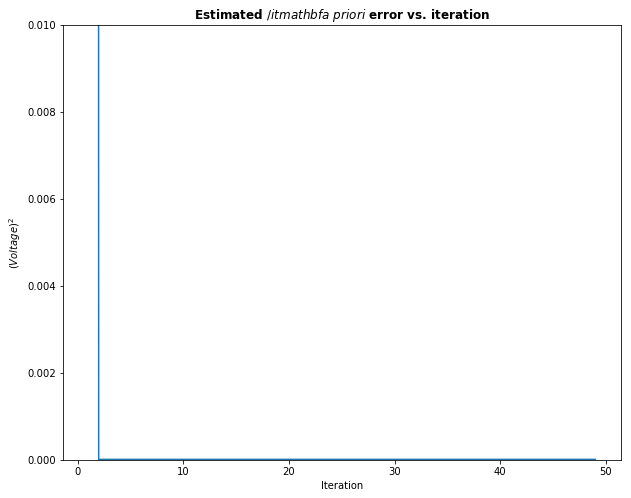

In [10]:
plt.figure
plt.plot(z, 'k+', label='noisy measurements')
plt.plot(xhat, 'b-', label='a posteri estimate')
plt.axhline(x,color='g', label='truth value')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')

plt.figure()
valid_iter = range(1,n_iter) #Pminus not valid at step 0
plt.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')
plt.title('Estimated $/it{mathbf{a \ priori}}$ error vs. iteration', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('$(Voltage)^2$')
plt.setp(plt.gca(),'ylim',[0,.01])
plt.show()